# Singular spectrum analysis

In [467]:
import numpy as np
import pandas as pd
from scipy.linalg import hankel
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns
import warnings
from numpy.matlib import repmat

In [468]:
x_test = np.array([[1,2,3,4,5,6,7,8]])

Function mustBeNumericArray

In [470]:
def mustBeNumericArray(x):
    """
    Checks if x is a numeric vector
    """
    if not isinstance(x,np.ndarray):
        warnings.warn("Array must be a numeric numpy array vector")
    
    [n,m] = x.shape
    if min(n,m)>1 or n == m:
        warnings.warn("Array must be a numeric numpy array vector")
    else:
        tf = True
    return tf
    

Tests

In [472]:
mustBeNumericArray(x_test)

True

In [473]:
mustBeNumericArray(pd.DataFrame(data = [1,2,3,4]))

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\1322968322.py:6: UserWarning: Array must be a numeric numpy array vector
  warnings.warn("Array must be a numeric numpy array vector")


True

In [474]:
#mustBeNumericArray([1,2,3,4])

In [475]:
#mustBeNumericArray(np.array([[1]]))

Function ValidateL0

In [477]:
def validateL0(L0, N):
    """
    Ensure L0 is a scalar
    """

    # Check if L0 is an integer
    if not isinstance(L0, int):
        warnings.warn("L0 is not an integer")

    # Make sure L0 is positive
    L = int(abs(L0))

    # Check if L0 is less than N/2
    N2 = np.floor(N/2)

    if L0>N2:
        warnings.warn("L0 is too high (Higher than L/2). Reducing it to L/2")
        L = int(N2)

    return L
    

In [478]:
validateL0(-1,8)

1

In [479]:
validateL0(6,8)

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\1083032433.py:17: UserWarning: L0 is too high (Higher than L/2). Reducing it to L/2
  warnings.warn("L0 is too high (Higher than L/2). Reducing it to L/2")


4

In [480]:
validateL0(3.0,8)

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\1083032433.py:8: UserWarning: L0 is not an integer
  warnings.warn("L0 is not an integer")


3

mustBePositive

In [482]:
def mustBePositive(value):
    """
    Checks if the input is a positive integer or if all elements in a list/array are positive numbers.

    Parameters:
    value (int or list/tuple): A single integer or a list/tuple of numbers.

    Returns:
    bool: True if the integer is positive or all numbers in the list/tuple are positive, False otherwise.
    """
    if isinstance(value, int):
        return value >= 0
    elif isinstance(value, (np.ndarray, np.matrix)):
        for x in value:
            if np.all(x<0):
                warnings.warn("Input must be all positive")
    else:
        raise TypeError("Input must be an integer or a list/tuple of numbers.")
    return True

In [483]:
R0_test = 1
R0_test_2 = np.array([[1,2,3,4,5]]).transpose()

In [484]:
mustBePositive(R0_test)

True

In [485]:
mustBePositive(R0_test_2)

True

checkMaxSingularValues

In [487]:
def checkMaxSingularValues(r0=None, L=None):

    max_singular_values = L

    if r0 is None:
        ft = True
        return [ft, max_singular_values]    
    
    if np.max(r0)>L:
        warnings.warn("For SSA recursive forecast, r0 must be less than L + 1, The space generated by the selected right singular vectors must not contain it")  
    else:
        ft = True 

    return [ft, max_singular_values]        


noGaps

In [489]:
def noGaps(G0):
    maxValue = np.max(G0)
    requiredNumbers = np.array(range(1,maxValue+1))
    presentNumbers = np.unique(G0)
    for i_number in requiredNumbers:
        if i_number not in presentNumbers:
            warnings.warn("G0 must not have any gaps.")

In [490]:
a = np.array([1,2,3,4])
noGaps(a)

validateG0

In [492]:
def validateG0(G0, L):
    # Check if empty
    if G0 is None:
        warnings.warn("G0 must be a non-empty, positive, numeric array or number")
    
    # Is G0 non-negative ToDo check if it can be an array
    if not mustBePositive(G0):
        warnings.warn("G0 must be a non-empty, positive, numeric array or number")

    checkMaxSingularValues(G0,L)
    noGaps(G0)

    if np.max(G0.shape) == L+1:
        return G0
    else:
        warnings.warn("ssaBasic:InvalidInput:validateG0','length(G0) must be equal to the embedding dimension")




In [493]:
G0_test = np.array([[1,2,3,4,5]]).transpose()

In [494]:
validateG0(G0_test, 25)

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\1807029417.py:16: UserWarning: ssaBasic:InvalidInput:validateG0','length(G0) must be equal to the embedding dimension
  warnings.warn("ssaBasic:InvalidInput:validateG0','length(G0) must be equal to the embedding dimension")


validateNumVal

In [496]:
#numVal = 2

In [497]:
def validateNumVal(numVal,L):

    if not np.isscalar(numVal):
        warnings.warn("nnumVal must be a scalar")

    numVal = abs(numVal)

    if numVal > L:
        warnings.warn("must be less than or equal to the embedding dimension L")

    return numVal

In [498]:
validateNumVal(4,2)

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\3555801218.py:9: UserWarning: must be less than or equal to the embedding dimension L
  warnings.warn("must be less than or equal to the embedding dimension L")


4

validateR0

In [500]:
def validateR0(r0, L):
    """
    Ensures r0 is a valid scalar or array of positive integers.
    Returns:
        r : a NumPy array of indices (1-based if scalar, as range)
    Raises:
        ValueError if input is invalid
    """
    if r0 is None or (hasattr(r0, '__len__') and len(r0) == 0):
        raise ValueError("r0 must be a non-empty, positive, numeric array or scalar")

    # Is G0 non-negative ToDo check if it can be an array
    if not mustBePositive(r0):
        warnings.warn("R0 must be a non-empty, positive, numeric array or number")

    # Convert to numpy array
    r0_arr = np.atleast_1d(r0)

    # Check if numeric and all positive
    if not np.issubdtype(r0_arr.dtype, np.number) or np.any(r0_arr < 0):
        raise ValueError(f"r0 must be a non-empty, positive, numeric array or scalar. Got: {type(r0).__name__} instead.")

    # Check if max(r0) is within bounds
    checkMaxSingularValues(r0_arr, L)

    # Return 1-based range if scalar
    if r0_arr.size == 1:
        return np.arange(0, int(r0_arr[0]))[np.newaxis,:]
    elif r0_arr.shape[0] == 1:
        return r0_arr.astype(int)
    else:
        return r0_arr.astype(int)[np.newaxis,:]

In [501]:
validateR0(1, 2)

array([[0]])

In [502]:
validateR0(np.array([1,2,3,4]), 25)

array([[1, 2, 3, 4]])

In [503]:
validateR0(np.array([[1,2,3,4]]), 25)

array([[1, 2, 3, 4]])

In [504]:
#validateR0(np.array([1,2,3,4]), 2)

## Functions

In [506]:
M_test = 12

In [507]:
G_test = np.array([1, 1, 2, 2])

In [508]:
r_test = np.array([0,1])

In [509]:
num_samp_test=100

Embedding function

In [511]:
def embedding(x, L0):
    """
    Constructs a Hankel matrix from the input numpy row vector x based on the lag L0.

    Parameters:
        x (np.ndarray): The input row vector (1, N) from which the Hankel matrix is constructed.
        L0 (int): The embedding dimension that determines the structure of the Hankel matrix.

    Returns:
        np.ndarray: The resulting Hankel matrix of size (N - L0 + 1) x (L0 + 1), where
                    each row represents overlapping segments of the input array.
    """

    Hx = hankel(x)
    
    N = x.shape[1]  # Get length from the second dimension
    
    # Construct the Hankel matrix
    Hx = np.array([x[0, i:N - L0 + i] for i in range(L0 + 1)])
    
    return Hx

Test embedding

In [513]:
embedding(x_test,2)

array([[1, 2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7, 8]])

ToDo Test

In [515]:
def constructor(x, L0 = None):
    mustBeNumericArray(x)
    
    [n,m] = x.shape
    
    N = x.size

    mX = np.mean(x)
    
    x = x - mX 
    
    # Make sure x is a row vector
    if n>m:
        x = x.transpose()
    
    # If L0 is not provided, set ut ti N/2 (Handled as default argument)
    if L0 is None:
        L0 = int(np.floor(N/2))
    
    L0 = validateL0(L0,N)
    
    Hx = embedding(x,L0)
    
    U, S, V = np.linalg.svd(Hx,full_matrices=False)
    Vt = V.transpose()
    S = np.diag(S)
    return [x, N, mX, L0, Hx, U, S, Vt]

In [516]:
#[x_out, N_out, mX_out, L0_out, Hx_out, U_out, S_out, V_out] = constructor(np.array([[1,2,3,4,5,6,7,8]]), 3)
[x_out_test, N_out_test, mX_out_test, L0_out_test, Hx_out_test, U_out_test, S_out_test, V_out_test] = constructor(x_test, 3)

In [517]:
def hankelization(Y):
    """
    Hankelization of matrix Y.
    Computes the averages of the anti-diagonals of matrix Y and 
    stores the results in a 1D array.
    
    Parameters:
        Y (np.ndarray): Input 2D matrix.
    Returns:
        np.ndarray: Row vector containing the averaged anti-diagonals.
    """
    n, m = Y.shape
    N = n + m - 1  # number of elements in the array y
    y = np.zeros((1, N))
    Y = np.fliplr(Y)  # flip Y along the vertical axis

    for ii in range(0, N): # CHANGED
        kk = ii - n + 1
        y[0, ii] = np.mean(np.diag(Y, kk))
    
    return np.flip(y)

In [518]:
 def reconstruction(U, S, V, r0, mX, L):
    r = validateR0(r0, L)
    Sr = np.diag(S)
    Sr = np.diag(Sr[r].flatten())
    y = U[:,r.flatten()] @ Sr @ V[:,r.flatten()].transpose()
    y = hankelization(y)     
    y = y + mX
    return y

In [519]:
reconstruction(U_out_test, S_out_test, V_out_test, 3, mX_out_test, L0_out_test)

array([[1., 2., 3., 4., 5., 6., 7., 8.]])

In [520]:
def grouping(G, L, S, U, V, mX, display = "off"):
    """
    GROUPING groups the eigentriples according to groups in G.
    y = grouping(obj,G) groups eigen-triples according to G
    where G is an array of numbers (e.g. G = [1 1 2 2 3]).
    Singular values with the same number in array G are
    collected in the same group (e.g. if G = [1 1 2] the first
    two eigen-triples are summed together and the third is
    considered in a separate group).
    """
    G = validateG0(G, L)
    m = int(np.max(G))
    n = U.shape[0] + V.shape[0] - 1
    y = np.zeros((m, n))
    allPos = np.array(range(0, L + 1))
    for ii in range(1,m+1):
        tmp_pos = allPos[G == ii] 
        tmp_d = np.diag(S)[np.newaxis,]
        tmp_u = U[:, tmp_pos] * repmat(tmp_d[0,tmp_pos],L+1,1)
        tmp_y = tmp_u @ V[:,tmp_pos].transpose() # ToDo
        y[ii-1, :] = hankelization(tmp_y) + mX  # Assuming obj has hankelization and mX


    if display == 'on':
        plt.figure(figsize=(8, 2 * m))  # Adjust figure size as needed
        
        for ii in range(0, m):
            plt.subplot(m, 1, ii + 1)
            plt.plot(y[ii, :])
            plt.xlim([0, n-1])
            plt.title(f'Component {ii + 1}')
            plt.xlabel('Obs')
            plt.ylabel(f'$x_{{{ii + 1}}}$')     
        plt.tight_layout()
        plt.show()

    return y

In [521]:
grouping(G_test, L0_out_test, S_out_test, U_out_test, V_out_test, mX_out_test)

array([[1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. ],
       [4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5]])

In [522]:
def bootstrap(r, m, U, S, V, mX, x, L):
    z = reconstruction(U, S, V, r, mX, L)
    z_len = np.max(z.shape)
    zt = z.transpose()  # Reshape to column vector
    xt = (x + mX).transpose()  # Reshape to column vector
    
    # Compute residuals using OLS
    beta = np.linalg.lstsq(np.hstack((np.ones((z_len, 1)), zt)), xt, rcond=None)[0]
    
    ols_res = (xt - np.hstack((np.ones((z_len, 1)), zt)) @ beta).flatten()
    # True bootstrapping
    random_indices = np.random.randint(0, z_len, size=(m, z_len))
    R = ols_res[random_indices]
    Rz = R + np.tile(z, (m, 1))
    return Rz

In [523]:
bootstrap(3, M_test, U_out_test, S_out_test, V_out_test, mX_out_test, x_out_test, L0_out_test)

array([[1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.]])

In [524]:
def forecastRecursive(y, P, M):
    """
    FORECASTRECURSIVE recursively forecasts y, M periods ahead.
    yNew = forecastRecursive(y,P,M) applies a recursive
    algorithm to project y on the r-space defined by the basis
    vectors in P, M periods ahead.

    Input:
    y      - A vector representing the time series data to be forecasted.
    P      - A matrix of basis vectors defining the r-space for
             projection.
    M      - The number of periods to forecast ahead.

    Output:
    yNew   - A vector containing the original time series data 
             followed by the forecasted values for the next M periods.
    """
    L1 = P[:-1, :].shape[0]
    y_len = y.shape[1]
    Hx = embedding(y, L1)
    Xhat = P @ P.T @ Hx  # project H on basis vectors
    Y = hankelization(Xhat)  # hankelization

    # apply recursion
    nu2 = np.sum(P[-1, :]**2)
    Pup = P[:-1, :] * P[-1, :]  # NumPy broadcasting handles repmat
    R = 1 / (1 - nu2) * np.sum(Pup, axis=1)[:,np.newaxis]
    yNew = np.zeros((1,y_len + M))
    yNew[0,:y_len] = Y

    for ii in range(0,M):
        yNew[:,y_len + ii] = yNew[:,y_len - L1 + ii:y_len + ii] @ R

    return yNew

In [525]:
def forecast(r0, M, x, mX, U, S, V, L, num_samp=100, display="off"):
    """
    FORECAST forecasts the signal according to basic SSA.
    xM = forecast(obj,r,M) forecasts the signal extracted from
    the original series x using the recursive algorithm, M
    times ahead.

    Input:
    r0        - A scalar or array specifying which singular values to
                use for the signal reconstruction. If r0 is a scalar, the method
                uses the first r0 singular values. If r0 is an array,
                it uses the singular values corresponding to the
                indices listed in r0 (e.g., r0 = [1, 2, 5] uses the
                1st, 2nd, and 5th singular values).
    M         - The number of periods to forecast ahead.
    num_samp  - (Optional) The number of bootstrap samples to generate
                for uncertainty estimation. Default is 100.

    Output:
    xM        - A vector containing the original time series data
                followed by the forecasted values for the next M periods.
    xCi       - A matrix containing the confidence intervals for the
                forecasted values, calculated from bootstrap samples.
                The intervals are determined using the 97.5th and 2.5th
                percentiles.
    xSamp     - A matrix containing forecast values derived from bootstrap
                samples to assess forecast uncertainty. Each row represents a
                different bootstrap sample forecast.
    """

    r = validateR0(r0, L) 
    
    P = U[:, r.flatten()]  # Adjust for 0-based indexing
    
    xM = forecastRecursive(x, P, M)
    xM = xM + mX

    if num_samp is not None:
        xSamp = np.zeros((num_samp, np.max(xM.shape)))
        xR = bootstrap(r.flatten(), num_samp, U, S, V, mX, x, L)
        xR = xR - mX

        for ii in range(0, num_samp):
            tmpZ = embedding(xR[ii, :][np.newaxis,:], L)
            tmpU, _, _ = np.linalg.svd(tmpZ, full_matrices=False)
            tmpP = tmpU[:, r.flatten()] # Adjust for 0-based indexing
            xSamp[ii, :] = forecastRecursive(xR[ii, :][np.newaxis,:], tmpP, M)

        xSamp = xSamp[:, -M:]
        xCi = np.percentile(xSamp, [97.5, 2.5], axis=0) # percentiles are swapped to match matlab output
        xCi = xCi + mX
        xSamp = xSamp + mX

        if display == "on":
            # Assuming obj.x, obj.mX, xSamp, and M are defined
            inSamp = int(np.floor(0.1 * np.max(x.shape)))
            Dy = np.arange(1, inSamp + 1)
            Dn = np.arange(inSamp + 1, inSamp + M + 1)
            
            # Historical data
            yHist = np.vstack((Dy, x[0, -inSamp:] + mX)).T
            
            # Forecast data (mean of samples)
            yFore = np.vstack((Dn, xSamp)).T

            lower = xCi[1, :]  # 2.5%
            upper = xCi[0, :]  # 97.5%
            
            # Fan plot replacement using matplotlib
            plt.figure(figsize=(10, 5))
            plt.plot(yHist[:, 0], yHist[:, 1], 'o-', label='Historical', color='black')

            for i_plot in range(1, num_samp):
                plt.plot(yFore[:, 0], yFore[:, i_plot], '--', linewidth=0.2)

            plt.plot(yFore[:, 0], yFore.mean(axis=1), 'o-', label='Forecast Mean', color='blue')
            
            plt.fill_between(Dn, lower, upper, color='blue', alpha=0.3, label='95% CI')
            
            plt.title('Forecast with SSA basic')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()        
        return xM, xCi, xSamp

    return xM, None, None

In [526]:
forecast(3, M_test, x_out_test, mX_out_test, U_out_test, S_out_test, V_out_test, L0_out_test, num_samp=100)

(array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
         14., 15., 16., 17., 18., 19., 20.]]),
 array([[ 9.        , 10.        , 11.        , 12.        , 13.00000001,
         14.        , 15.00000039, 16.00000007, 17.00002773, 18.00000282,
         19.00198005, 20.00010789],
        [ 9.        , 10.        , 11.        , 12.        , 13.        ,
         13.99999986, 14.99999999, 15.99998216, 16.99999982, 17.99780011,
         18.99999514, 19.72866111]]),
 array([[ 9.        , 10.        , 11.        , ..., 18.00000122,
         18.99999326, 20.00003734],
        [ 9.        , 10.        , 11.        , ..., 18.        ,
         19.        , 20.        ],
        [ 9.        , 10.        , 11.        , ..., 17.99999978,
         18.99999902, 19.9999957 ],
        ...,
        [ 9.        , 10.        , 11.        , ..., 18.        ,
         19.        , 20.        ],
        [ 9.        , 10.        , 11.        , ..., 18.        ,
         19.        , 

In [527]:
def plotSingularValues(L, S, num_values=None, display='double'):
    """
    PLOTSINGULARVALUES Plots ordered singular values and their contributions.
    plotSingularValues(obj) creates two plots:
    1. A scree plot of the first numValues singular values.
    2. A bar plot of the relative cumulative contribution of each singular value
       to the overall signal variance.

    Inputs:
        num_values - The number of singular values to plot (default is obj.L).
        display - (optional) A string that specifies the type of plot:
                   'double' (default) for both singular values and contributions,
                   'cm' for only contributions,
                   'scree' for only singular values,
                   'none' for no plot.
    """

    if num_values is None:
        num_values = min(L, 30)
    D = np.diag(S)
    Drel = np.cumsum(D) / np.sum(D)

    # make plot
    plt.figure()
    display_lower = display.lower()

    if display_lower == 'double':
        # plot singular values
        plt.subplot(2, 1, 1)
        plt.stem(D[:num_values])
        plt.title(f'First {num_values} Singular Values')
        plt.xlabel('Lags')
        plt.ylabel('singular values')
        # plot relative singular values
        plt.subplot(2, 1, 2)
        plt.bar(np.arange(1, num_values + 1), Drel[:num_values])
        plt.xlabel('Lags')
        plt.ylabel('relative contribution')
        plt.title('Cumulated Singular Values:\n Relative contribution to signal variance')
    elif display_lower == 'cm':
        plt.bar(np.arange(1, num_values + 1), Drel[:num_values])
        plt.xlabel('Lags')
        plt.ylabel('relative contribution')
        plt.title('Cumulated Singular Values:\n Relative contribution to signal variance')
    elif display_lower == 'scree':
        plt.stem(D[:num_values], filled=True)
        plt.title(f'First {num_values} Singular Values')
        plt.xlabel('Lags')
        plt.ylabel('singular values')
    else:
        raise ValueError('Available display options are: double, scree, cm')

    plt.show()

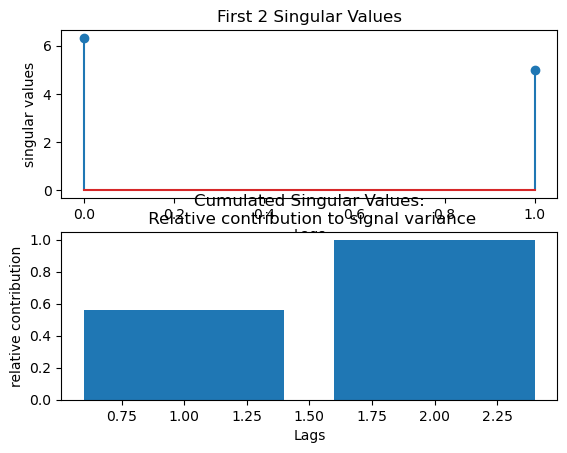

In [528]:
plotSingularValues(2, S_out_test, num_values=None, display='double')

In [529]:
def wcorrelation(G, L, S, U, V, mX, display='on'):
    """
    WCORRELATION returns the w-correlation matrix of two series.
    C = wcorrelation(obj,G) returns a symmetric matrix C of
    weighted correlation coefficients calculated from an input
    nvar-by-nobs matrix Y where columns are observations and
    rows are variables, and an input 1-by-nobs vector w of
    weights for the observations.
    """

    # Validate G0
    G = validateG0(G, L)
    
    Y = grouping(G, L, S, U, V, mX)
    n_obs = Y.shape[1]  # nobs: number of observations; nvar: number of variables

    # ---------------- compute weights ---------------
    w = np.zeros((1,n_obs))
    
    L = L + 1
    w[0, :L] = np.arange(1, L + 1)
    w[0, (L+1):n_obs - L + 1] = L
    w[0, n_obs - L + 1:] = n_obs - np.arange(n_obs - L + 1, n_obs) - 1

    # ------------------------------------------------
    w_mean = (Y @ w.transpose()) / np.sum(w)  # weighted means of Y
    #temp = Y - w_mean[:, np.newaxis]  # center Y by removing weighted means
    temp = Y - w_mean  # center Y by removing weighted means
    
    temp = temp @ (temp * w).T  # weighted covariance matrix
    temp = 0.5 * (temp + temp.T)  # Must be exactly symmetric
    R = np.diag(temp)
    C = temp / np.sqrt(R * R[:, np.newaxis])  # Matrix of Weighted Correlation Coefficients
    # -------------------------------------------------
    # plot w-correlation matrix
    if display == 'on':
        plt.figure()
        sns.heatmap(np.abs(C))
        plt.title('w-correlation matrix')
        plt.show()

    return C

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\2710704022.py:33: RuntimeWarning: invalid value encountered in divide
  C = temp / np.sqrt(R * R[:, np.newaxis])  # Matrix of Weighted Correlation Coefficients


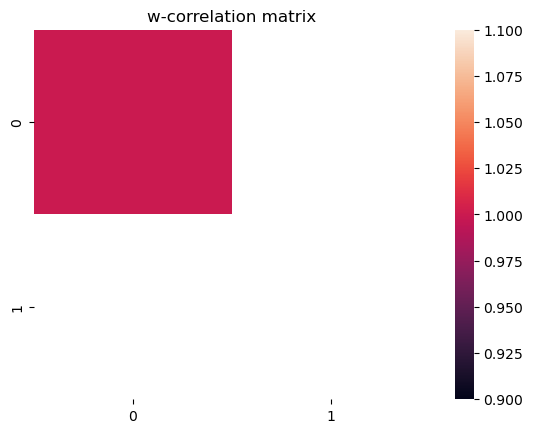

array([[ 1., nan],
       [nan, nan]])

In [530]:
wcorrelation(G_test, L0_out_test, S_out_test, U_out_test, V_out_test, mX_out_test, display='on')

In [531]:
def scatterplotsEigenvectors(V, L, G):
    """
    Scatter-plots of the paired singular vectors according to groups in G.
    Produces plots of paired eigenvectors to show the periodicity of the corresponding component.

    Parameters:
    obj: An object with a 2D NumPy array attribute `V` (eigenvectors)
    G: A list or NumPy array of group labels for the eigenvectors
    """
    validateG0(G, L)
    
    len_g = np.max(G.shape)
    max_group = int(np.max(G))
    all_pos = np.arange(0, len_g)

    # draw figure
    plt.figure()
    for k in range(1, max_group + 1):
        indices = all_pos[G == k]  # Adjust for 0-based indexing
        if np.max(indices.shape) == 2:
            tmp_x = V[:, indices]  # Transpose to match MATLAB's column-wise extraction
            plt.subplot(max_group, 1, k)
            # plt.scatter(tmp_x[0, :], tmp_x[1, :], marker=".")
            plt.plot(tmp_x[:, 0], tmp_x[:, 1])
            plt.grid(True)
            plt.title(f'Scatterplot of Group_{k}')
            plt.xlabel(f'V_{indices[0] + 1}')  # Adjust for 1-based indexing
            plt.ylabel(f'V_{indices[1] + 1}')  # Adjust for 1-based indexing
            plt.axis('equal')  # Equal scaling for both axes
        else:
            print(f'Component {k} corresponds to {len(indices)} singular vectors; scatter plot not possible.')
    plt.show()

## Introduction

Singular Spectrum Analysis (SSA) is a non-parametric technique of time series analysis and forecasting. SSA aims at decomposing the original series in a small number of possibly interpretable components such as a slowly varying trend, oscillatory components, and noise.
This documentation describes the ssaBasic class which implements the Singular Spectrum Analysis (SSA) according to the book "Analysis of Time Series Structure: SSA and Related Techniques" by N. Golyandina, V. Nekrutkin, and A. Zhigljavsky, 2001.

### Methods of the class ssaBasic

### 1. CONSTRUCTOR: ssaBasic(data, L0)

Initializes the ssaBasic class with the original time series data and the number of Lags L0 (or window length).


In [533]:
# Parameters
N = 400
t = np.arange(1, N + 1) - np.floor(N / 2)

# Generate data
data = t / 40 + 4 * np.sin(2 * np.pi * t / 40) + 2 * (np.random.rand(1, N) - 0.5)

# Embedding dimension
L0 = int(np.floor(N / 2))

r = np.array([1,2])

In [534]:
[x, N, mX, L0, H, U, S, V] = constructor(data, L0)

In [535]:
[n,m] = x.shape

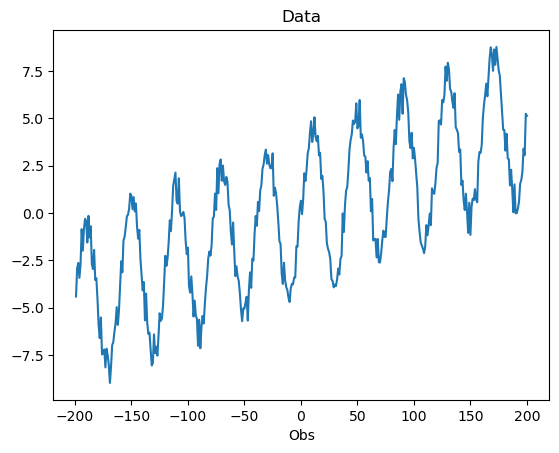

In [536]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, data.flatten())
ax.set_title("Data")
ax.set_xlabel("Obs")
plt.show()

### 2. ssaBasic.plotSingularValues(numValues, display)

The method plotSingularValues visualizes the singular values and their contribution to the overall signal variance, helping to interpret the importance of each component in Singular Spectrum Analysis. The method produces one or two types of plots depending on the value of the display parameter. The scree plot shows the first numValues singular values in descending order, highlighting the most significant components. The cumulative contribution plot is a bar chart that displays the relative cumulative contribution of each singular value to the total variance in the signal.
The method takes two parameters. The first parameter, numValues, specifies the number of singular values to display in the plots. The second parameter, display, determines which plot or plots are generated. If display is set to 'double' (default), both the scree plot and the cumulative contribution plot are produced. If display is set to 'scree', only the scree plot is created, while setting it to 'cm' generates only the cumulative contribution plot.


In [538]:
numValues = 10

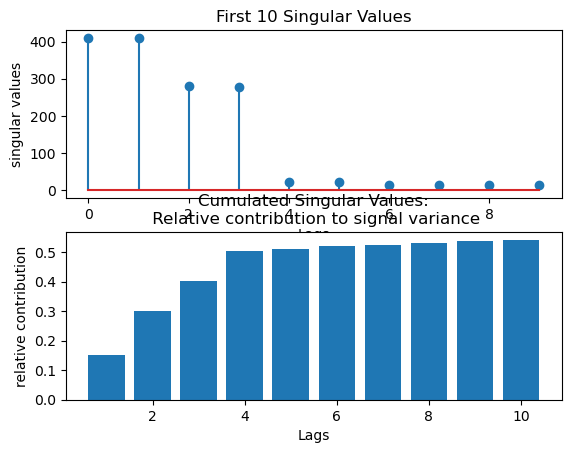

In [539]:
plotSingularValues(L0, S, num_values=numValues, display='double')

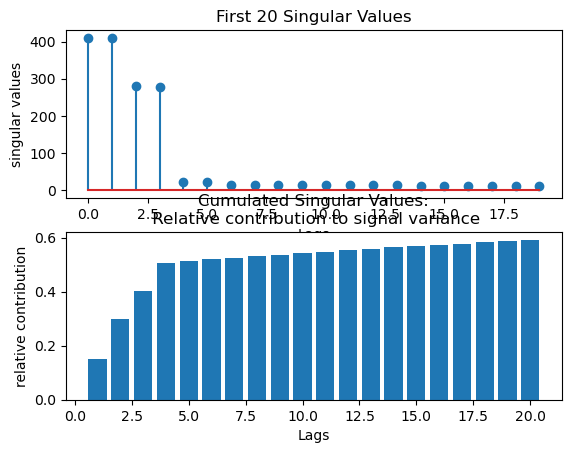

In [540]:
plotSingularValues(20, S, num_values=None, display='double')

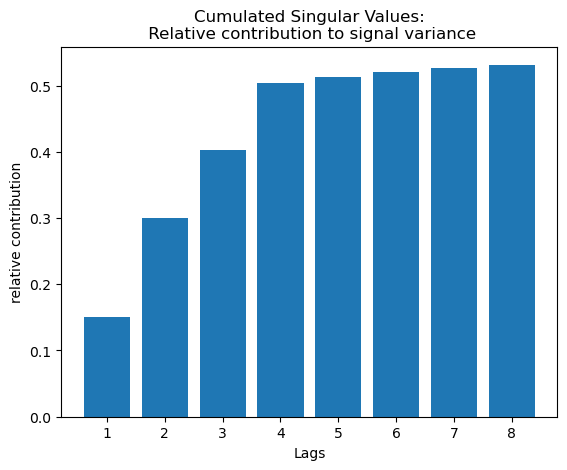

In [541]:
# Cumulative contribution plot for the first 8 singular values
plotSingularValues(8, S, num_values=None, display='cm')

### 3. C = ssaBasic.wcorrelation(Group, display)

The method wcorrelation assesses how separated are the eigen-triples (groups), according to the clusters specified in the array Group. In particular, the weighted correlation matrix quantifies the (weighted) correlation between these latter components. By default, this method draws the weighted correlation matrix for visual analysis. However, if the display parameter is set to any string other than 'on', the matrix will not be plotted.

In [543]:
# Compute the weighted correlation matrix and plot it 
G_2 = np.zeros(L0+1, dtype=int)
G_2[0] = 1
G_2[1] = 1
G_2[2] = 2
G_2[3] = 2

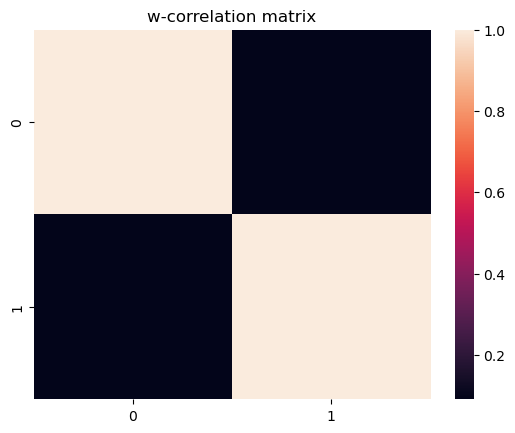

In [544]:
wcorMatrix = wcorrelation(G_2, L0, S, U, V, mX, display='on')

In [545]:
wcorMatrix

array([[1.        , 0.09086517],
       [0.09086517, 1.        ]])

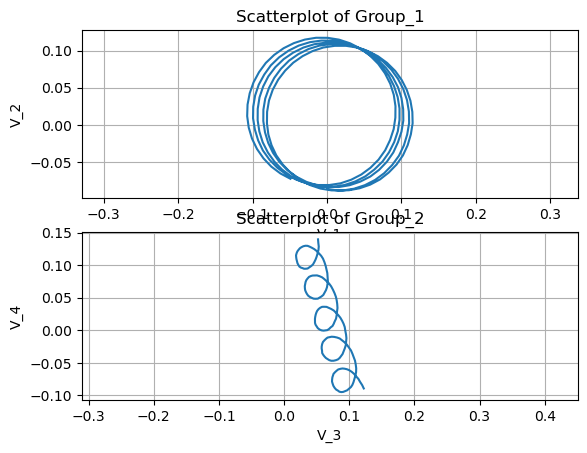

In [546]:
# Create scatter plots of eigenvectors to analyze periodicity
scatterplotsEigenvectors(V, L0, G_2);

crossval_L0

In [548]:
r0 = 4
qInSample=0.8
numTest=100
display="on"

In [549]:
def crossval_L0(r0, L0, x, mX ,qInSample = 0.9, numTest = 100, display= "on"):

    r0 = validateR0(r0, L0)
    if not isinstance(qInSample, (int, float)) or not (0 <= qInSample <= 1):
        warnings.warn('qInSample must be a number between 0 and 1.')

    numInSamp = int(np.max(x.shape) * qInSample)
    X0 = x + mX

    inX = X0[0, :numInSamp][np.newaxis, :]
    outX = X0[0,numInSamp:][np.newaxis, :]
    
    max_L0 = int(numInSamp // 2)

    min_L0 = np.max(r0)+1

    array_test = np.floor(np.linspace(min_L0, max_L0, numTest)).astype(int)[:, np.newaxis]

    inErr = np.zeros((numTest,1))
    outErr = np.zeros((numTest,1))

    for ii in range(0, numTest):
        [x_tmp, N_tmp, mX_tmp, L0_tmp, Hx_tmp, U_tmp, S_tmp, V_tmp] = constructor(inX, int(array_test[ii,0]))
    
        # In-sample reconstruction error
        tmpX_in = reconstruction(U_tmp, S_tmp, V_tmp, r0, mX_tmp, L0_tmp)
        inErr[ii, 0] = np.sqrt(np.mean((inX - (tmpX_in + mX_tmp)) ** 2))
    
        # Out-of-sample forecast error
        [tmpX_out, xCi_out, xSamp_out] = forecast(r0, np.max(outX.shape), x_tmp, mX_tmp, U_tmp, S_tmp, V_tmp, L0_tmp, num_samp=100)
        #outErr[ii]= np.sqrt(np.mean((outX - (tmpX_out[numInSamp:] + mX)) ** 2))

        outErr[ii, 0]= np.sqrt(np.mean((outX - (tmpX_out[0,numInSamp:])) ** 2))

    totErr = (1 - qInSample) * inErr + qInSample * outErr

    best_idx = np.argmin(totErr)
    best_L0 = array_test[best_idx,0]
    best_rmse = totErr[best_idx]

    if display == "on":
        plt.figure(figsize=(10, 5))
        plt.plot(array_test, np.log(outErr), 'd', label='outError', markersize=7)
        plt.plot(array_test, np.log(inErr), 's', label='inError', markersize=7)
        plt.plot(array_test, np.log(totErr), '-', linewidth=1.5, label='total')
        plt.title(f'Cross-validation r with r_prior = {max(r0)}')
        plt.xlabel('L')
        plt.ylabel('RMSE (log-scale)')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.xlim([array_test[0], array_test[-1]])
        plt.tight_layout()
        plt.show()

    return best_L0, best_rmse

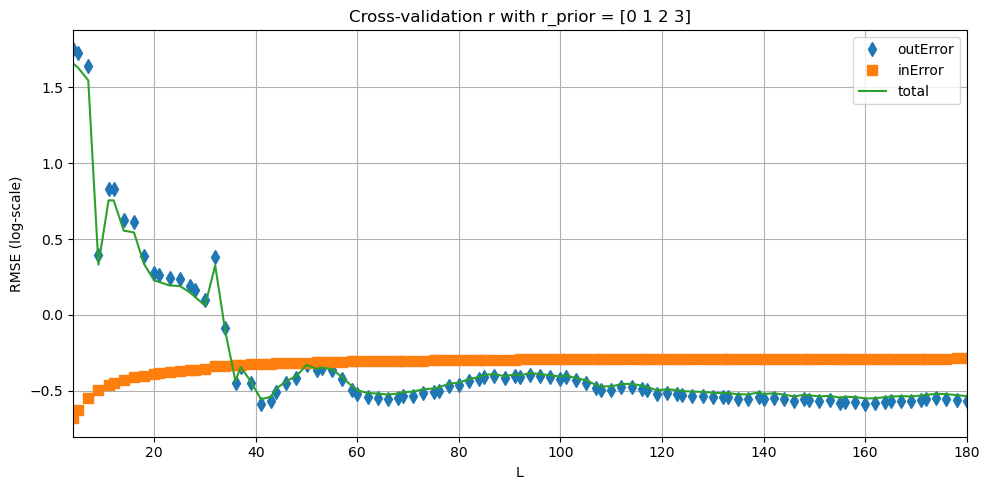

In [550]:
[best_L0, best_rmse] = crossval_L0(r0, L0, x, mX)

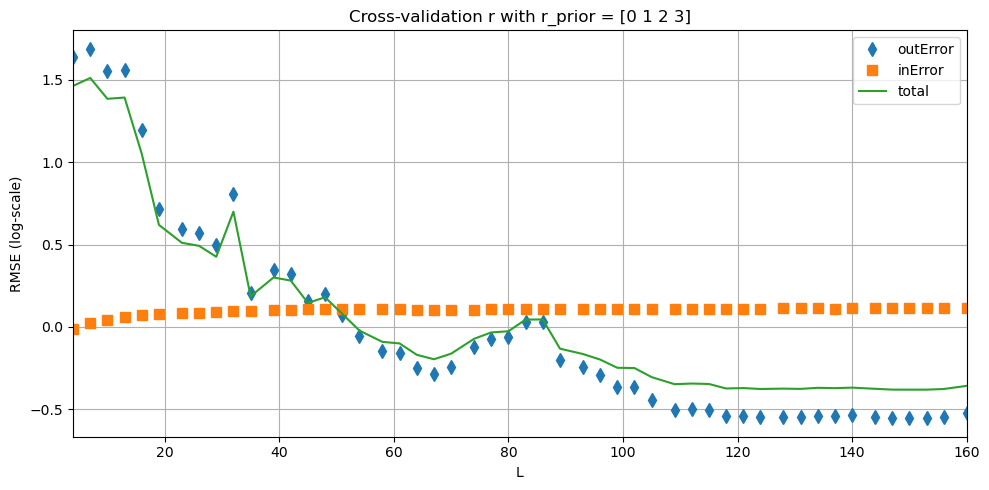

In [551]:
[best_L0, best_rmse] = crossval_L0(r0, L0, x, mX ,0.8, 50, display)

In [552]:
[best_L0, best_rmse] = crossval_L0(r0, L0, x, mX ,0.8, 50, "off")

crossval_R0

In [554]:
def crossval_r0(x, mX ,L0, qInSample=0.9, numTest=100, display="on"):

    if not isinstance(qInSample, (int, float)) or not (0 <= qInSample <= 1):
        warnings.warn('qInSample must be a number between 0 and 1.')

    numInSamp = int(np.floor(np.max(x.shape) * qInSample))
    X0 = x + mX

    inX = X0[0, :numInSamp][:, np.newaxis]
    outX = X0[0, (numInSamp+1):][:, np.newaxis]

    [x_tmp, N_tmp, mX_tmp, L0_tmp, Hx_tmp, U_tmp, S_tmp, V_tmp] = constructor(inX, L0)

    [ft, max_r0] = checkMaxSingularValues(None, L0_tmp)

    array_test = np.floor(np.linspace(2, max_r0-1, numTest)).astype(int)[:, np.newaxis]

    inErr = np.zeros((numTest,1))
    outErr = np.zeros((numTest,1))
        
    for ii in range(0, numTest):
 #       [x_tmp, N_tmp, mX_tmp, L0_tmp, Hx_tmp, U_tmp, S_tmp, V_tmp] = constructor(inX, int(array_test[ii]))
        # In-sample reconstruction error
        tmpX = reconstruction(U_tmp, S_tmp, V_tmp, int(array_test[ii, 0]), mX_tmp, L0_tmp)
        inErr[ii, 0] = np.sqrt(np.mean((inX - tmpX) ** 2))
    
        # Out-of-sample forecast error
        [tmpX, xCi_out, xSamp_out] = forecast(int(array_test[ii, 0]), np.max(outX.shape), x_tmp, mX_tmp, U_tmp, S_tmp, V_tmp, L0_tmp, num_samp=100)
        #outErr[ii]= np.sqrt(np.mean((outX - (tmpX[(numInSamp+1):] + mX)) ** 2))
        outErr[ii, 0]= np.sqrt(np.mean((outX - tmpX[0, numInSamp:]) ** 2))

    # total error (in-sample + out-sample)
    totErr = (1 - qInSample) * inErr + qInSample * outErr
    best_idx = np.argmin(totErr)
    best_r0 = array_test[best_idx, 0]

    best_rmse = totErr[best_idx]

    if display == "on":
        plt.figure(figsize=(10, 5))
        plt.plot(array_test, np.log(outErr), 'd', label='outError', markersize=7)
        plt.plot(array_test, np.log(inErr), 's', label='inError', markersize=7)
        plt.plot(array_test, np.log(totErr), '-', linewidth=1.5, label='total')
        plt.title(f'Cross-validation r with L = {L0}')
        plt.xlabel('L')
        plt.ylabel('RMSE (log-scale)')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.xlim([array_test[0], array_test[-1]])
        plt.tight_layout()
        plt.show()
    
    return best_r0, best_rmse

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\1083032433.py:17: UserWarning: L0 is too high (Higher than L/2). Reducing it to L/2
  warnings.warn("L0 is too high (Higher than L/2). Reducing it to L/2")


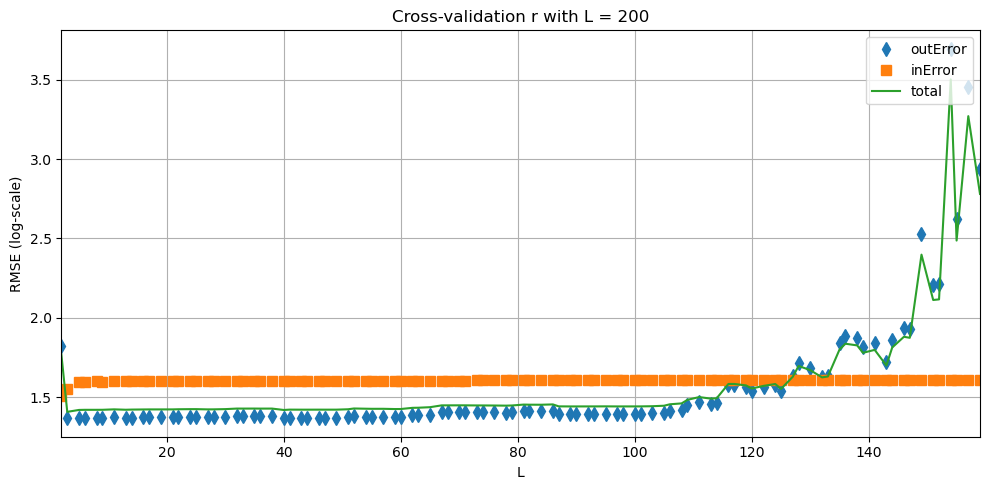

In [555]:
[best_L0, best_rmse] = crossval_r0(x, mX , int(L0), qInSample, numTest, display)

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\1083032433.py:17: UserWarning: L0 is too high (Higher than L/2). Reducing it to L/2
  warnings.warn("L0 is too high (Higher than L/2). Reducing it to L/2")


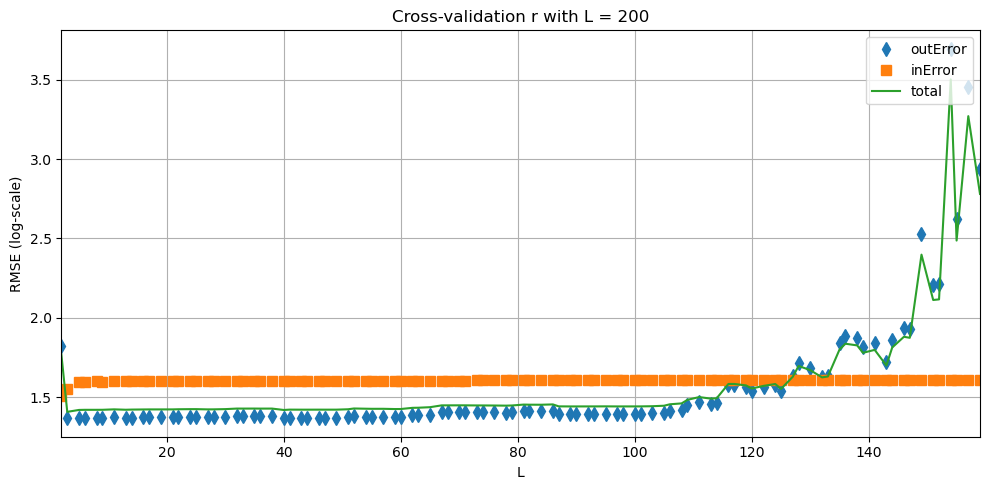

In [556]:
[best_L0, best_rmse] = crossval_r0(x, mX , int(L0), 0.8, 100, display)

In [557]:
[best_L0, best_rmse] = crossval_r0(x, mX , int(L0), 0.8, 50, "off")

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\1083032433.py:17: UserWarning: L0 is too high (Higher than L/2). Reducing it to L/2
  warnings.warn("L0 is too high (Higher than L/2). Reducing it to L/2")


Function backtest

In [559]:
def backtest(x, L, N, r0, qInSample):
    """
    Performs SSA forecast backtesting with optional red noise model for residual correction.

    Parameters:
        x            : time series data (1D array)
        L            : SSA window length
        N            : length of the time series (should be len(x))
        r0           : list or array of eigentriple indices (or max r0 as int)
        qInSample    : list/array of proportions (between 0 and 1) for in-sample size

    Returns:
        testRMSE     : array of RMSEs, shape (len(qInSample), 2)
        xF           : forecasts, shape (max out-sample length, 2)
    """
    # Validate inputs
    r0 = validateR0(r0, L)
    # qInSample = np.atleast_1d(qInSample)
    if np.any((qInSample < 0) | (qInSample > 1)):
        raise ValueError("qInSample must be numbers between 0 and 1.")

    lenqInSample = np.max(qInSample.shape)
    testRMSE = np.zeros((lenqInSample, 2))
    minInSamp = int(np.floor(min(qInSample) * N))
    maxOutSamp = N - minInSamp
    xF = np.zeros((maxOutSamp, 2))

    for idx, q in enumerate(qInSample):
        inSampObs = int(np.floor(q * N))
        outSampObs = N-inSampObs
        inX = x[:, :inSampObs] + mX
        outX = x[:, inSampObs:]
        [x_tmp, N_tmp, mX_tmp, L0_tmp, Hx_tmp, U_tmp, S_tmp, V_tmp] = constructor(inX, L)
        # SSA forecasting
        [xF_SSA, xCi, xSamp] = forecast(r0, outSampObs, x_tmp, mX_tmp, U_tmp, S_tmp, V_tmp, L, 100)
        xR_SSA = xF_SSA[:,:inSampObs]
        xF_SSA = xF_SSA[:,inSampObs:]
        testRMSE[idx, 0] = np.sqrt(np.mean((outX + mX_tmp - xF_SSA) ** 2))
        xF_SSA_SARIMA = np.zeros(outSampObs)
    xF[:,0] = xF_SSA
    xF[:,1] = xF_SSA_SARIMA

    return testRMSE, xF

In [560]:
r0 = 4;
# Run the backtest for SSA with r = 4, using 70% and 80% of the data as in-sample
[testRMSE, xF] = backtest(x, L0, N, r0, np.array([0.9, 0.8]))

C:\Users\grego\AppData\Local\Temp\ipykernel_23172\1083032433.py:17: UserWarning: L0 is too high (Higher than L/2). Reducing it to L/2
  warnings.warn("L0 is too high (Higher than L/2). Reducing it to L/2")


In [561]:
testRMSE

array([[0.61924198, 0.        ],
       [1.29021941, 0.        ]])

In [562]:
r0 = 4
[x_tmp, N_tmp, mX_tmp, L0_tmp, Hx_tmp, U_tmp, S_tmp, V_tmp] = constructor(x, L0)
reconstructedSignal = reconstruction(U_tmp, S_tmp, V_tmp, r0, mX_tmp, L0_tmp)

In [563]:
t = np.array(range(1,np.max(data.shape)+1))[np.newaxis,:]

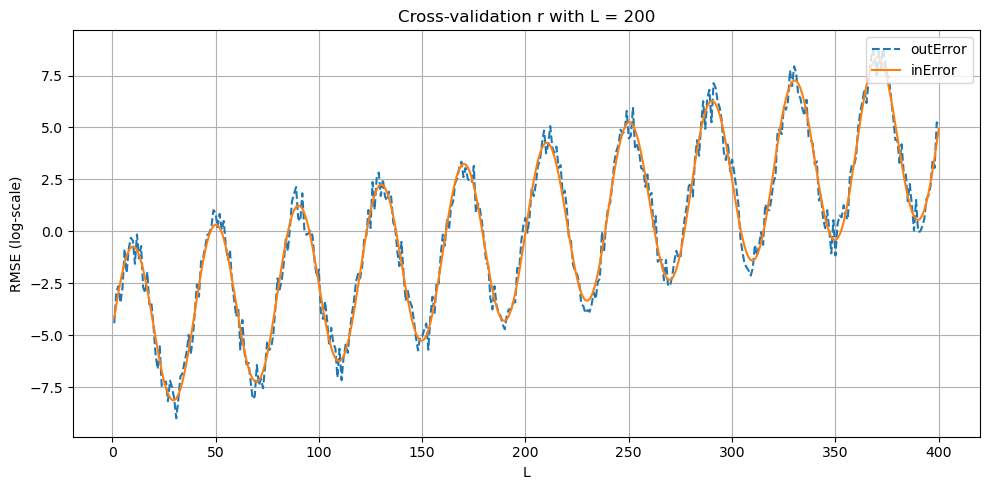

In [564]:
plt.figure(figsize=(10, 5))
plt.plot(t.T, data.T, '--', label='outError')
plt.plot(t.T, reconstructedSignal.T, '-', label='inError', markersize=7)
#plt.plot(array_test, np.log(totErr), '-', linewidth=1.5, label='total')
plt.title(f'Cross-validation r with L = {L0}')
plt.xlabel('L')
plt.ylabel('RMSE (log-scale)')
plt.legend(loc='upper right')
plt.grid(True)
#plt.xlim([array_test[0], array_test[-1]])
plt.tight_layout()
plt.show()


In [565]:
r0 = 4
[x_tmp, N_tmp, mX_tmp, L0_tmp, Hx_tmp, U_tmp, S_tmp, V_tmp] = constructor(x, L0)

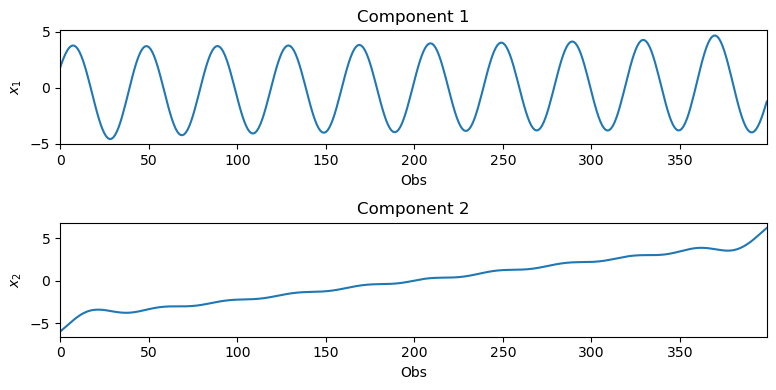

In [566]:
groupedComponents = grouping(G_2, L0_tmp, S_tmp, U_tmp, V_tmp, mX_tmp, "on")

In [567]:
groupedComponents = grouping(G_2, L0_tmp, S_tmp, U_tmp, V_tmp, mX_tmp, 'off');

In [568]:
r0 = 4
M = 10

In [569]:
[xM, xCi, xSamp] = forecast(r0, M, x_tmp, mX_tmp, U_tmp, S_tmp, V_tmp, L0_tmp, num_samp=100)

In [570]:
# Reconstruct the signal using the 1st, 2nd, and 4th singular values and forecast 10 periods ahead
r0 = np.array([1, 2, 4])
[xM, xCi, xSamp] = forecast(r0, M, x_tmp, mX_tmp, U_tmp, S_tmp, V_tmp, L0_tmp, num_samp=100)

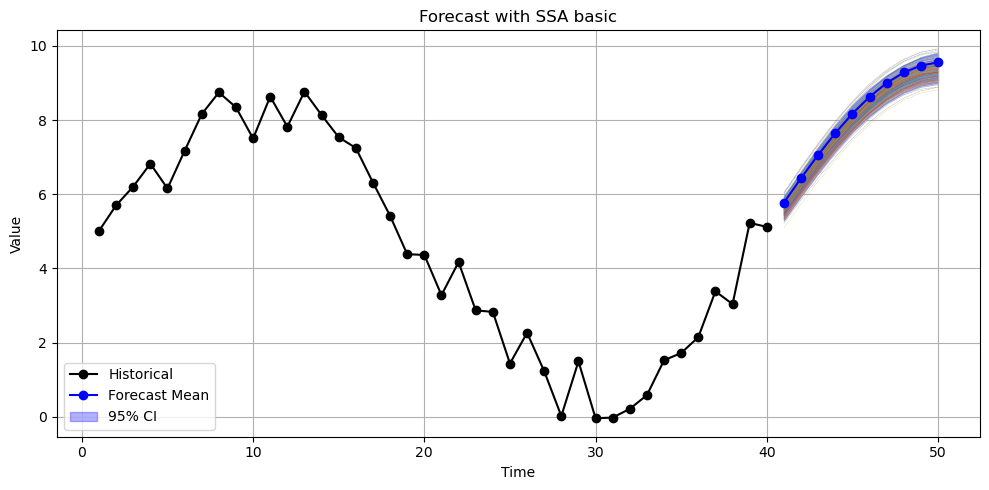

In [571]:
# Reconstruct the signal, forecast 10 periods ahead, generate 200 bootstrap samples, and display the fan plot
# ToDo plots
r0 = 4
[xM, xCi, xSamp] = forecast(r0, M, x_tmp, mX_tmp, U_tmp, S_tmp, V_tmp, L0_tmp, 200, "on")

In [572]:
x_test_orig_2 = np.array([[1,2,3,4,5,6,7,8]])

In [573]:
r0_test = 3

In [574]:
G_test_2 = np.array([1, 1, 2, 0])

In [575]:
[x_test_2, N_test_2, mX_test_2, L0_test_2, H_test_2, U_test_2, S_test_2, V_test_2] = constructor(x_test_orig_2, r0_test)

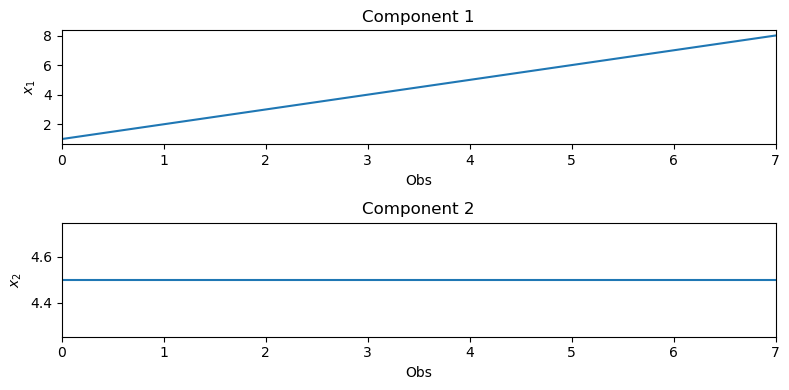

array([[1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. ],
       [4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5]])

In [576]:
grouping(G_test_2, L0_test_2, S_test_2, U_test_2, V_test_2, mX_test_2, "on")